Length of the horizontal member(m): 1
Number of members in bottom chord (should be even): 4
Height of bridge(m): 1


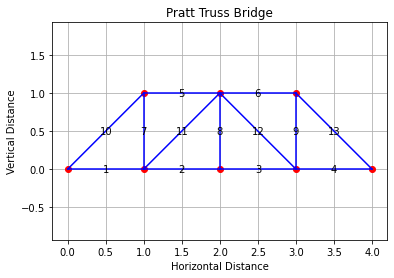

Enter the ILD for which member (type 'q' to exit): 10


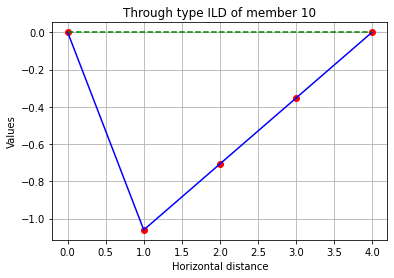

Enter the ILD for which member (type 'q' to exit): 3


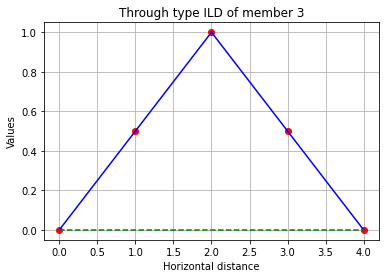

Enter the ILD for which member (type 'q' to exit): 4


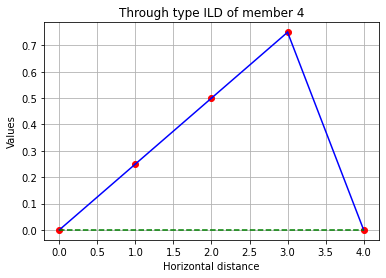

Enter the ILD for which member (type 'q' to exit): 5


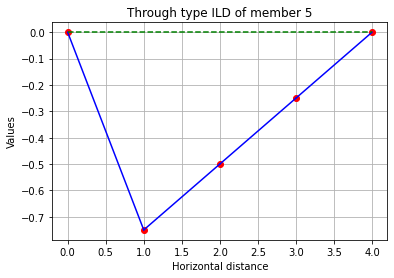

Enter the ILD for which member (type 'q' to exit): 8


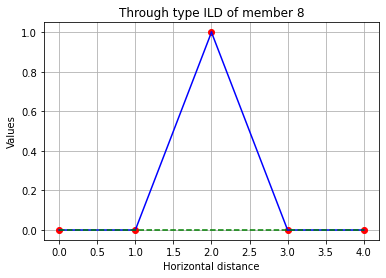

Enter the ILD for which member (type 'q' to exit): 7


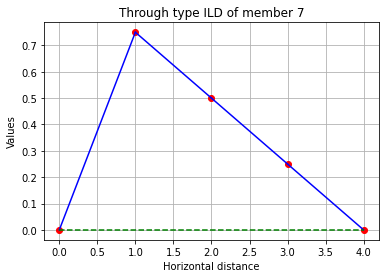

Enter the ILD for which member (type 'q' to exit): q
Goodbye!


In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import bridges
# Making ILD for through type
length = int(input("Length of the horizontal member(m): "))
n = int(input("Number of members in bottom chord (should be even): "))
while n % 2 != 0:
    n = int(input("Number of members in bottom chord (should be even): "))
    if n % 2 != 0:
        print("Warning: n should be an even number for a Pratt truss bridge.")
    
height = int(input("Height of bridge(m): "))

# Assign coordinates of endpoints [(x1,y1), (x2,y2)] of members to a number (labelling members)
assign = {}
bj = [(i * length, 0) for i in range(n + 1)]
tj = [((i + 1) * length, height) for i in range(n-1)]
for i in range(n):
    assign[f'{i+1}'] = [(bj[i][0], bj[i][1]), (bj[i + 1][0], bj[i + 1][1])]
for i in range(n-2):
    assign[f'{i+n+1}'] = [(tj[i][0], tj[i][1]), (tj[i + 1][0], tj[i + 1][1])]
for i in range(n-1):
    assign[f'{i+2*n-1}'] = [(tj[i][0], tj[0][1]), (bj[i+1][0], bj[i+1][1])]
for i in range(int(n/2)):
    assign[f'{i+3*n-2}'] = [(tj[i][0], tj[i][1]), (bj[i][0], bj[i][1])]
for i in range(int(n/2-1), n-1):
        assign[f'{i+3*n-1}'] = [(tj[i][0], tj[i][1]), (bj[i+2][0], bj[i+2][1])]
# Get all values of ILD for through type
import numpy as np
total_joints = bj+tj
loading = 1
C = np.zeros((n+1, 4*n-3))
for Joint in range(n+1):
    A = np.zeros((4*n,4*n-3))
    B = np.zeros(4*n)
    if Joint == 0:
        B = np.zeros(4*n)
    elif Joint == n:
        B = np.zeros(4*n)
    else:
        B[2*n+Joint] = loading
        B[2*n] = -(n-Joint)*loading/n
        B[3*n] = -(Joint)*loading/n
    for m in range(2*n):
        filtered_data = {k: v for k, v in assign.items() if total_joints[m] in v}
        for k, v in filtered_data.items():
            if v[1] == total_joints[m]:
                filtered_data[k] = [v[1],v[0]]
        int_keys = [int(key) for key in filtered_data.keys()]
        for i in int_keys:
            A[m,i-1] = filtered_data[f'{i}'][1][0] - filtered_data[f'{i}'][0][0]
            A[2*n+m,i-1] = filtered_data[f'{i}'][1][1] - filtered_data[f'{i}'][0][1]
    # Final solution for force on each member due to applied loading at given joint
    X, residuals, rank, s = np.linalg.lstsq(A, B, rcond=None)
    np.set_printoptions(precision=4, suppress=True)
    for i in range(4*n-3):
        x1,y1 = assign[f'{i+1}'][0]
        x2,y2 = assign[f'{i+1}'][1]
        dx = x2 - x1
        dy = y2 - y1
        distance = math.sqrt(dx**2 + dy**2)
        X[i] = X[i]*distance
    C[Joint] = X
C_rounded = np.round(C, decimals=4)

# Plot the ILD
x = np.zeros(n+1)
for i in range(n+1):
    x[i] = i*length
bridges.howe(height, length, n)
while True:
    user_input = input("Enter the ILD for which member (type 'q' to exit): ")
    if user_input.lower() == "q":
        print("Goodbye!")
        break
    try:
        ILD = int(user_input)
        y = C_rounded[:, ILD - 1]
        plt.plot(x, y, 'ro')
        for k in range(n):
            plt.plot((x[k], x[k + 1]), (y[k], y[k + 1]), 'b-')
        plt.plot((x[0], x[n]), (y[0], y[n]), 'g--')
        plt.xlabel('Horizontal distance')
        plt.ylabel('Values')
        plt.title(f'Through type ILD of member {ILD}')
        plt.grid(True)
        plt.show()
    except ValueError:
        print("Invalid input. Please enter an integer or type 'q' to exit.")